<a href="https://colab.research.google.com/github/PratikshaShelke24/ttteam_task/blob/main/session10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#session 10

In [ ]:
#Random Forest

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

In [3]:
# Drop rows with missing target values
titanic_data = titanic_data.dropna(subset=['Survived'])

In [4]:
# Select relevant features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

In [5]:
# Convert categorical variable 'Sex' to numerical
X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

In [6]:

# Handle missing values in the 'Age' column
X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

In [7]:

# Handle missing values in the 'Fare' column (just in case)
X.loc[:, 'Fare'].fillna(X['Fare'].median(), inplace=True)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [10]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [13]:
# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[89 16]
 [20 54]]


In [14]:

import matplotlib.pyplot as plt
import seaborn as sns


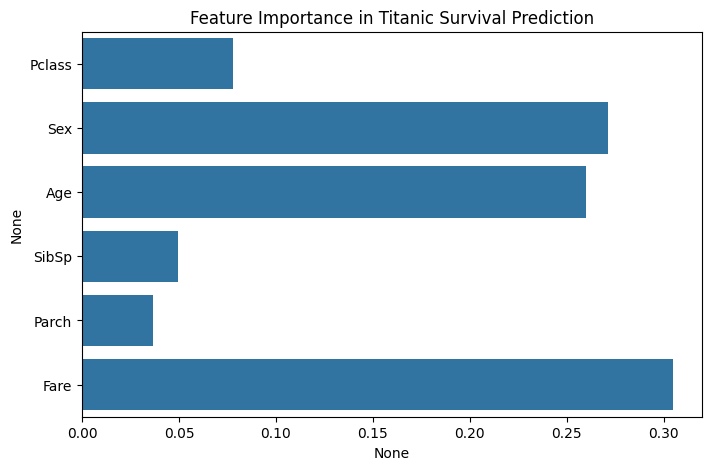

In [15]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance in Titanic Survival Prediction")
plt.show()